In [1]:
%%capture

from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('../data/cleaned.html') as f:
    html = f.read().replace("<br>", '\n')
    dfList = pd.read_html(html)
    if len(dfList) != 1:
        print("Did not get exactly one table.")
    df = dfList[0]

In [3]:
contributions = defaultdict(int)

for _, cont in list(df.iterrows())[:-1]: # ignore 'Total Contributions:' row
    contributions[ cont['Contributor'] ] += cont['Amt']

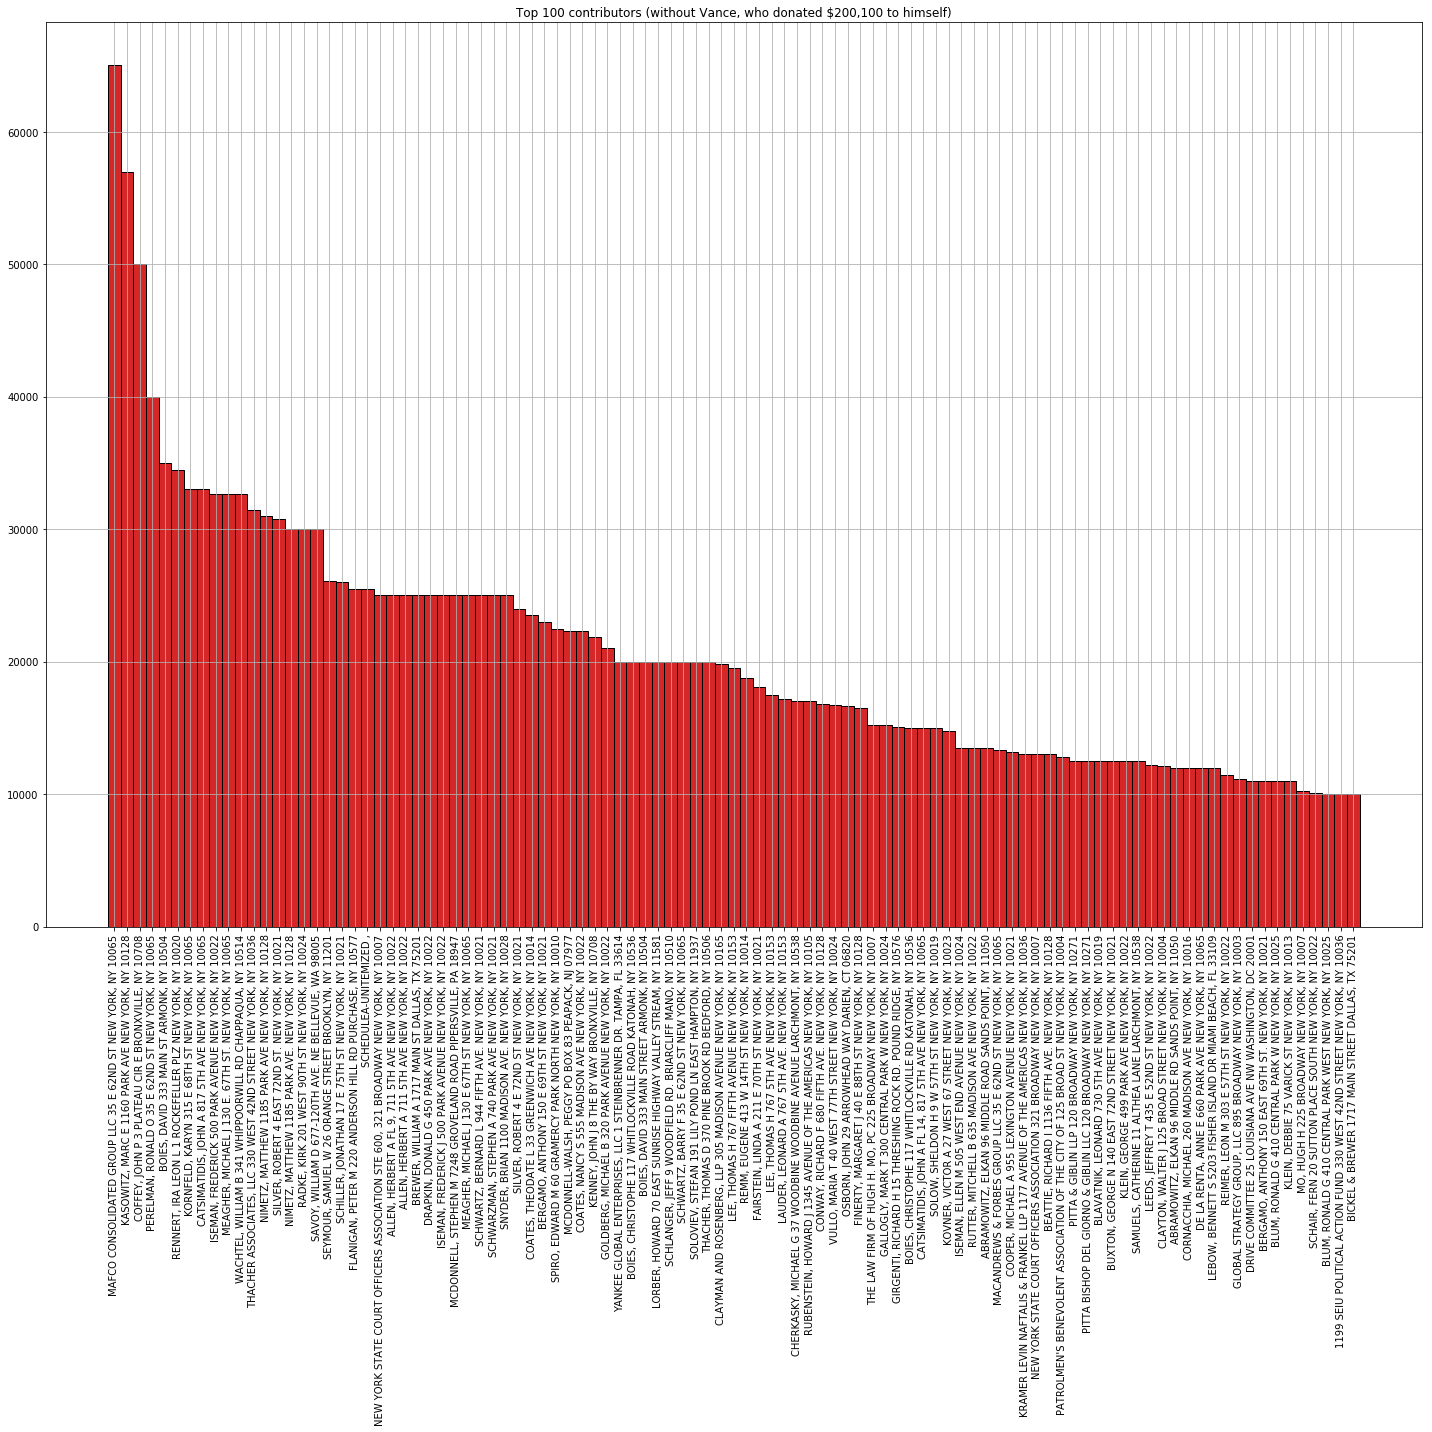

In [6]:
conts = sorted(contributions.items(), key=lambda v: v[1], reverse=True)[:100]
conts = conts[1:] # ignore top contributor (Vance)

indices = np.arange(len(conts))
plt.figure(figsize=(20, 20))
plt.bar(indices, [cont[1] for cont in conts], 1, color='#d62728', edgecolor='black')
plt.xticks(ticks=indices, labels=[cont[0] for cont in conts], rotation='vertical')
plt.title("Top 100 contributors (without Vance, who donated $200,100 to himself)")
plt.grid()
plt.tight_layout()
# plt.savefig('../img/top100.png')

In [23]:
contributions = defaultdict(int)

for _, cont in list(df.iterrows())[:-1]:
    date = str(cont['Contr. Date']).split('-')
    if int(date[-1]) >= 15:
        contributions[ cont['Contributor'] ] += cont['Amt']

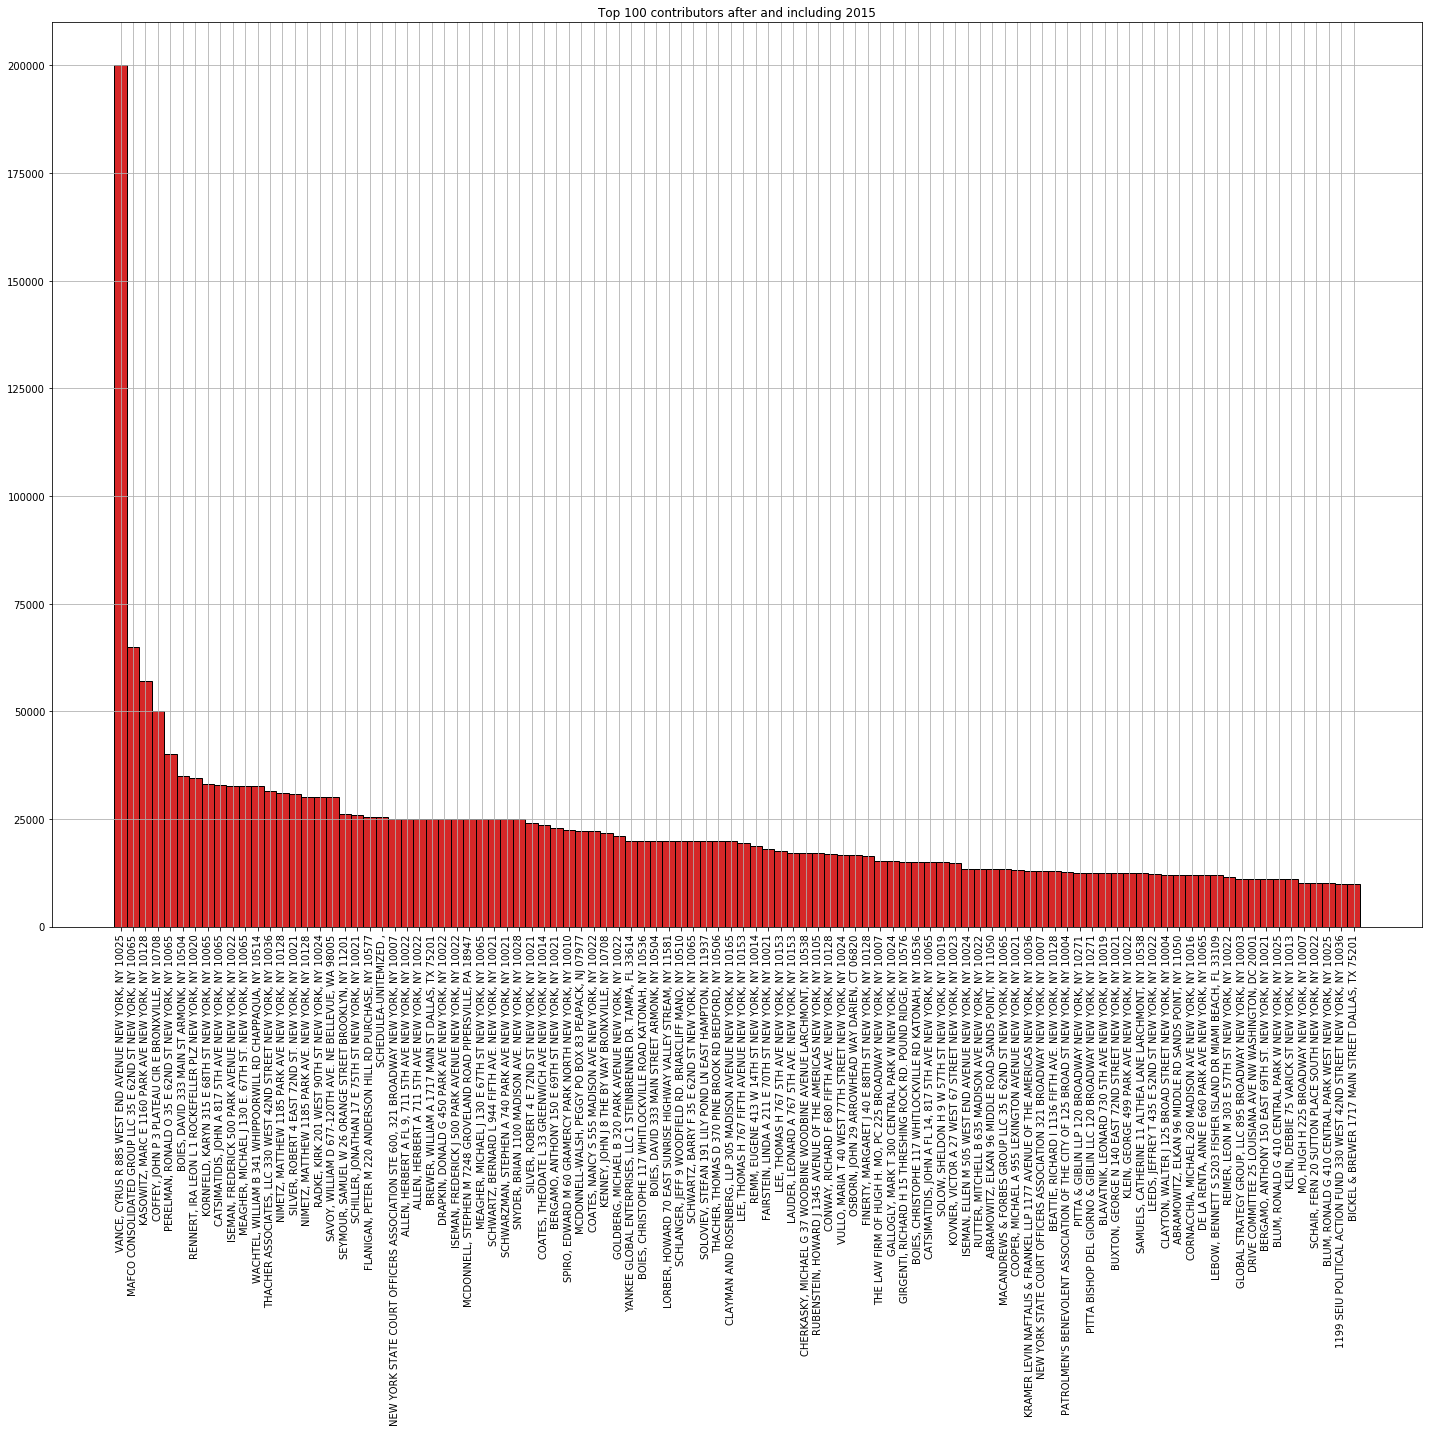

In [7]:
conts = sorted(contributions.items(), key=lambda v: v[1], reverse=True)[:100]
indices = np.arange(len(conts))

plt.figure(figsize=(20, 20))
plt.bar(indices, [cont[1] for cont in conts], 1, color='#d62728', edgecolor='black')
plt.xticks(ticks=indices, labels=[cont[0] for cont in conts], rotation='vertical')
plt.title("Top 100 contributors after and including 2015")
plt.grid()
plt.tight_layout()
# plt.savefig('../img/top100After2015.png')